# Custom SVR Tests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import customsvr


from sklearn.model_selection import train_test_split
from sklearn import svm
from training import *

# First test: linear example
Generating data points from a linear objective function with gaussian noise

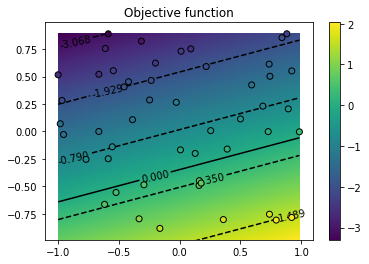

In [2]:
npoints = 50
noise = 0.1
w = np.random.randn(3)

X = np.random.rand(npoints, 2)*2 -1
y = np.matmul(X,w[:2])+w[2] + (np.random.randn(npoints)*noise)

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/4)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')

plt.axis('tight')
x1_min, x1_max, x2_min, x2_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
    
X1, X2 = np.mgrid[x1_min:x1_max:200j, x1_min:x2_max:200j]
Y = np.matmul(np.c_[X1.ravel(), X2.ravel()],w[:2])+w[2]

#color plot the original function
Y = Y.reshape(X1.shape)
mesh = plt.pcolormesh(X1, X2, Y)
con = plt.contour(X1, X2, Y, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(con, inline=1, fontsize=10)
zeroc = plt.contour(X1, X2, Y, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroc, inline=1, fontsize=10)
plt.colorbar(mesh, extendfrac='auto')

plt.title("Objective function")
plt.show()

Linear Custom SVR
Score: 0.994053


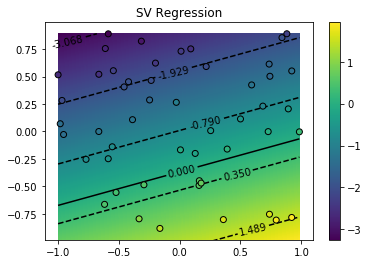

Number of support vectors: 13


In [3]:
print("Linear Custom SVR")
svr_lin = customsvr.SVR(C=1.0, epsilon=0.1, kernel='linear')
svr_lin.fit(X_Train,y_Train)
print("Score: %f" % svr_lin.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ylsvr = svr_lin.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshlsvr = plt.pcolormesh(X1, X2, Ylsvr)
conlsvr = plt.contour(X1, X2, Ylsvr, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(conlsvr, inline=1, fontsize=10)
zeroclsvr = plt.contour(X1, X2, Ylsvr, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroclsvr, inline=1, fontsize=10)
plt.colorbar(meshlsvr, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print("Number of support vectors: %d" % len(svr_lin.sv))

Linear Custom SVR with grid search model selection

Best parameters set found on development set:
(16, 0, 0, 0.01, 'auto', 'linear')
Test score: 0.979174


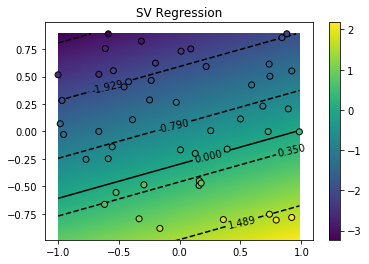

Number of support vectors: 33


In [4]:
print("Linear Custom SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)


param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': ['auto'], 'degree': [0], 'coef0':[0], 'kernel': ['linear']},
 ]

best_result = (0,-np.inf)

for i in range(10):
    curr_result = SVR_gridsearch_holdout(X, y, customsvr.SVR, param_grid, 20, 25)
    if curr_result[1] > best_result[1]:
        best_result = curr_result

best_params = best_result[0]

print("Best parameters set found on development set:")
print(best_params)
best_svr = customsvr.SVR(C=best_params[0], coef0=best_params[1], degree=best_params[2], epsilon=best_params[3], gamma=best_params[4], kernel=best_params[5])
best_svr.fit(X_Train,y_Train)
print("Test score: %f" % best_svr.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = best_svr.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print("Number of support vectors: %d" % len(best_svr.sv))

**Comparison with Sklearn SVR**

Linear Sklearn SVR
Score: 0.993332


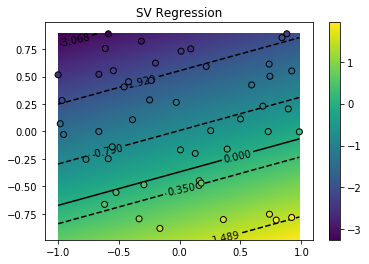

Number of support vectors: 13


In [5]:
print("Linear Sklearn SVR")
svr_lin = svm.SVR(C=1.0, epsilon=0.1, kernel='linear')
svr_lin.fit(X_Train,y_Train)
print("Score: %f" % svr_lin.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ylsvr = svr_lin.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshlsvr = plt.pcolormesh(X1, X2, Ylsvr)
conlsvr = plt.contour(X1, X2, Ylsvr, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(conlsvr, inline=1, fontsize=10)
zeroclsvr = plt.contour(X1, X2, Ylsvr, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroclsvr, inline=1, fontsize=10)
plt.colorbar(meshlsvr, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print("Number of support vectors: %d" % len(svr_lin.support_vectors_))

Linear Sklearn SVR with grid search model selection

Best parameters set found on development set:
(2, 0, 0, 0.05, 'auto', 'linear')
Test score: 0.993351


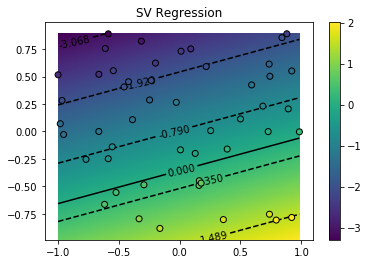

Number of support vectors: 25


In [6]:
print("Linear Sklearn SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)


param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': ['auto'], 'degree': [0], 'coef0':[0], 'kernel': ['linear']}
 ]

best_result = (0,-np.inf)

for i in range(10):
    curr_result = SVR_gridsearch_holdout(X, y, svm.SVR, param_grid, 20, 25)
    if curr_result[1] > best_result[1]:
        best_result = curr_result

best_params = best_result[0]

print("Best parameters set found on development set:")
print(best_params)
best_svr = svm.SVR(C=best_params[0], coef0=best_params[1], degree=best_params[2], epsilon=best_params[3], gamma=best_params[4], kernel=best_params[5])
best_svr.fit(X_Train,y_Train)
print("Test score: %f" % best_svr.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = best_svr.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print("Number of support vectors: %d" % len(best_svr.support_vectors_))

# Second Test: Nonlinear example
Generating data points from a nonlinear objective function with gaussian noise

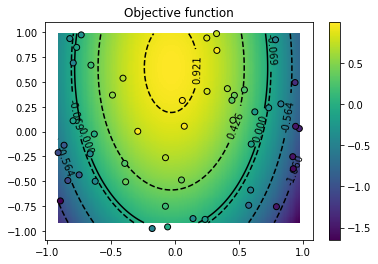

In [3]:
npoints = 50
noise = 0.1
w = np.random.randn(5)

X = np.random.rand(npoints, 2)*2 -1
X_t = np.concatenate((X, X**2), axis=1)
y = np.matmul(X_t,w[:4])+w[4] + (np.random.randn(npoints)*noise)

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/4)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')

plt.axis('tight')
x1_min, x1_max, x2_min, x2_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
    
X1, X2 = np.mgrid[x1_min:x1_max:200j, x1_min:x2_max:200j]
Y = np.matmul(np.concatenate((np.c_[X1.ravel(), X2.ravel()],np.c_[X1.ravel(), X2.ravel()]**2), axis=1),w[:4])+w[4]

#color plot the original function
Y = Y.reshape(X1.shape)
mesh = plt.pcolormesh(X1, X2, Y)
con = plt.contour(X1, X2, Y, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(con, inline=1, fontsize=10)
zeroc = plt.contour(X1, X2, Y, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroc, inline=1, fontsize=10)
plt.colorbar(mesh, extendfrac='auto')

plt.title("Objective function")
plt.show()

Custom SVR with grid search model selection

Best parameters set found on development set:
(0.5, 1, 3, 0.001, 1, 'poly')
Test score: 0.881053


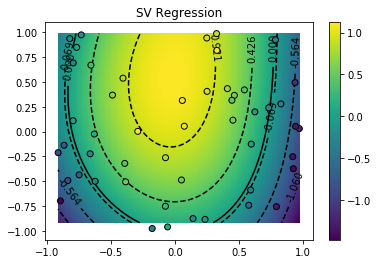

Number of support vectors: 37


In [4]:
print("Custom SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': ['auto'], 'degree':[1], 'coef0': [0], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'degree': [1], 'coef0': [0], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'degree': [1,2,3,4], 'coef0': [0, 1, 10, 100], 'kernel': ['poly']}
 ]

best_result = (0,-np.inf)

for i in range(10):
    curr_result = SVR_gridsearch_holdout(X, y, customsvr.SVR, param_grid, 20, 25)
    if curr_result[1] > best_result[1]:
        best_result = curr_result

best_params = best_result[0]

print("Best parameters set found on development set:")
print(best_params)
best_svr = customsvr.SVR(C=best_params[0], coef0=best_params[1], degree=best_params[2], epsilon=best_params[3], gamma=best_params[4], kernel=best_params[5])
best_svr.fit(X_Train,y_Train)
print("Test score: %f" % best_svr.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = best_svr.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print("Number of support vectors: %d" % len(best_svr.sv))

**Comparison with Sklearn SVR**

Sklearn SVR with grid search model selection

Best parameters set found on development set:
(0.5, 100, 3, 0.001, 0.1, 'poly')
Test score: 0.977157


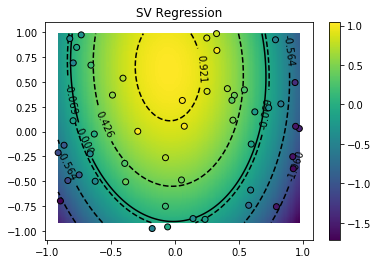

Number of support vectors: 37


In [5]:
print("Sklearn SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': ['auto'], 'degree':[1], 'coef0': [0], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'degree': [1], 'coef0': [0], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001], 'degree': [1,2,3,4], 'coef0': [-100, -10, -1, 0, 1, 10, 100], 'kernel': ['poly']}
 ]

best_result = (0,-np.inf)

for i in range(10):
    curr_result = SVR_gridsearch_holdout(X, y, svm.SVR, param_grid, 20, 25)
    if curr_result[1] > best_result[1]:
        best_result = curr_result

best_params = best_result[0]

print("Best parameters set found on development set:")
print(best_params)
best_svr = svm.SVR(C=best_params[0], coef0=best_params[1], degree=best_params[2], epsilon=best_params[3], gamma=best_params[4], kernel=best_params[5])
best_svr.fit(X_Train,y_Train)
print("Test score: %f" % best_svr.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = best_svr.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print("Number of support vectors: %d" % len(best_svr.support_vectors_))